In [1]:
import geoplot as gplt 
import geopandas as gpd 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import mapclassify as mc
import geoplot.crs as gcrs
import numpy as np
import seaborn as sns

In [13]:
#loading primary dataset 

bridge_points = gpd.read_file("../GennyPlots/ShapeFilesFile/NBI/National_Bridge_Inventory.shp")
pd.set_option('display.max_columns', None)
bridge_points.head()


,STATE_CODE,STRUCTURE_,RECORD_TYP,ROUTE_PREF,SERVICE_LE,ROUTE_NUMB,DIRECTION_,HIGHWAY_DI,COUNTY_COD,PLACE_CODE,FEATURES_D,CRITICAL_F,FACILITY_C,LOCATION_0,MIN_VERT_C,KILOPOINT_,BASE_HWY_N,LRS_INV_RO,SUBROUTE_N,LAT_016,LONG_017,DETOUR_KIL,TOLL_020,MAINTENANC,OWNER_022,FUNCTIONAL,YEAR_BUILT,TRAFFIC_LA,TRAFFIC__1,ADT_029,YEAR_ADT_0,DESIGN_LOA,APPR_WIDTH,MEDIAN_COD,DEGREES_SK,STRUCTURE1,RAILINGS_0,TRANSITION,APPR_RAIL_,APPR_RAIL1,HISTORY_03,NAVIGATION,NAV_VERT_C,NAV_HORR_C,OPEN_CLOSE,SERVICE_ON,SERVICE_UN,STRUCTUR_1,STRUCTUR_2,APPR_KIND_,APPR_TYPE_,MAIN_UNIT_,APPR_SPANS,HORR_CLR_M,MAX_SPAN_L,STRUCTUR_3,LEFT_CURB_,RIGHT_CURB,ROADWAY_WI,DECK_WIDTH,VERT_CLR_O,VERT_CLR_U,VERT_CLR_1,LAT_UND_RE,LAT_UND_MT,LEFT_LAT_U,DECK_COND_,SUPERSTRUC,SUBSTRUCTU,CHANNEL_CO,CULVERT_CO,OPR_RATING,OPERATING_,INV_RATING,INVENTORY_,STRUCTURAL,DECK_GEOME,UNDCLRENCE,POSTING_EV,WATERWAY_E,APPR_ROAD_,WORK_PROPO,WORK_DONE_,IMP_LEN_MT,DATE_OF_IN,INSPECT_FR,FRACTURE_0,UNDWATER_L,SPEC_INSPE,FRACTURE_L,UNDWATER_1,SPEC_LAST_,BRIDGE_IMP,ROADWAY_IM,TOTAL_IMP_,YEAR_OF_IM,OTHER_STAT,OTHER_ST_1,OTHR_STATE,STRAHNET_H,PARALLEL_S,TRAFFIC_DI,TEMP_STRUC,HIGHWAY_SY,FEDERAL_LA,YEAR_RECON,DECK_STRUC,SURFACE_TY,MEMBRANE_T,DECK_PROTE,PERCENT_AD,NATIONAL_N,PIER_PROTE,BRIDGE_LEN,SCOUR_CRIT,FUTURE_ADT,YEAR_OF_FU,MIN_NAV_CL,FED_AGENCY,SUBMITTED_,BRIDGE_CON,LOWEST_RAT,DECK_AREA,STATUS,DATE,LATDD,LONGDD,geometry
0,29,1,1,3,1,00006,0,01,021,64550,IS 29,0.0,MO 6 E,S 2 T 57 N R 35 W,99.99,0.793,1,0000003556,0,39463723,094473709,10,3,01,01,14,1958,6,4,15423,2023,4,25.0,0,7,0,1,0,0,0,5,N,0.0,0.0,A,5,1,4,02,0,00,4,0,23.8,17.1,61.6,1.5,1.5,23.8,28.5,99.99,H,4.83,H,3.4,5.7,6,7,7,N,N,1,58.5,1,35.1,7,5,5,5,N,8,None,None,0.0,722,24,N,N,N,None,None,None,0,0,0,0,None,None,None,0,N,2,None,1,0,1992,1,1,0,1,5,0,None,Y,N,20821,2043,0.0,N,29,F,6,1755.60,AM,1202,39.776933,-94.793517,POINT (-94.79352 39.77693)
1,29,10,1,2,1,00036,0,01,025,27784,LIT OTTER CR,0.0,US 36 E,S 21 T 57 N R 27 W,99.99,80.150,1,0000003560,0,39440616,093562572,1,3,01,01,02,1958,4,0,8566,2023,4,24.7,2,0,0,N,N,N,N,5,0,0.0,0.0,A,1,5,2,19,0,00,2,0,24.7,3.0,6.4,0.0,0.0,0.0,0.0,99.99,N,0.00,N,0.0,0.0,N,N,N,6,5,0,72.0,0,43.2,5,N,N,5,8,8,None,None,0.0,1222,24,N,N,N,None,None,None,0,0,0,0,None,None,None,0,N,2,None,1,0,2000,N,N,N,N,41,1,None,Y,8,17989,2043,0.0,N,29,F,5,158.08,AM,1202,39.735267,-93.940350,POINT (-93.94035 39.73527)
2,29,100,1,1,1,00029,0,03,165,29026,OWL CR,0.0,IS 29 S,S 25 T 54 N R 35 W,99.99,157.835,1,0000005878,0,39273317,094471789,1,3,01,01,01,1958,4,0,36821,2023,5,34.1,2,30,0,1,1,1,1,5,0,0.0,0.0,A,1,5,2,19,0,00,2,0,30.4,2.7,6.6,0.0,0.0,0.0,0.0,99.99,N,0.00,N,0.0,0.0,N,N,N,7,4,0,99.9,0,99.9,4,N,N,5,8,8,35,1,1.3,1222,24,N,N,N,None,None,None,204,20,306,2024,None,None,None,1,N,2,None,1,0,0,N,N,N,N,25,1,None,Y,8,75483,2043,0.0,N,29,P,4,225.06,AM,0303,39.466333,-94.787725,POINT (-94.78773 39.46633)
3,29,1000,1,2,1,00060,0,06,077,70000,JAMES RVR,0.0,US 60 E,S 15 T 28 N R 21 W,99.99,141.811,1,0000007782,0,37072768,093133368,1,3,01,01,12,1965,2,0,15996,2023,4,15.2,1,20,0,1,1,1,1,5,0,0.0,0.0,P,1,5,4,02,0,00,3,0,15.2,45.7,120.4,0.2,0.2,15.2,16.1,99.99,N,0.00,N,0.0,0.0,7,5,6,8,N,1,45.9,1,27.9,5,9,N,5,8,8,None,None,0.0,722,24,N,N,N,None,None,None,0,0,0,0,None,None,None,2,R,1,None,1,0,2009,1,4,0,0,12,1,None,Y,8,24794,2043,0.0,N,29,F,5,1938.44,AM,0303,37.124864,-93.226503,POINT (-93.2265 37.12486)
4,29,10000,1,3,1,00076,0,07,067,45272,CLEVER CR,0.0,MO 76 E,S 1 T 26 N R 14 W,99.99,291.470,0,None,None,36581862,092254722,48,3,01,01,07,1940,2,0,419,2023,0,7.3,0,0,0,0,0,0,0,5,0,0.0,0.0,A,1,5,2,01,0,00,5,0,6.7,3.2,15.5,0.0,0.0,6.7,7.2,99.99,N,0.00,N,0.0,0.0,5,5,5,6,N,1,26.1,1,16.2,5,4,N,5,4,6,None,None,0.0,223,24,N,N,N,None,None,None,0,0,0,0,None,None,None,0,N,2,None,0,0,0,1,6,0,0,12,0,None,Y,8,649,2043,0.0,N,29,F,5,111.60,AM,1202,36.972156,-92.429808,POINT (-92.42981 36.97216)


In [ ]:
#loading in contextualizing data, county line polygons, MODOT District polygons, and MODOT maintained roads lines

county_bounds = gpd.read_file("../GennyPlots/ShapeFilesFile/MO_County_Boundaries/MO_County_Boundaries.shp")
county_bounds.to_crs(crs=None, epsg=4326, inplace=True)
districts = gpd.read_file("../GennyPlots/ShapeFilesFile/MO_MoDOT_Districts/MO_MoDOT_Districts.shp")
districts.to_crs(crs=None, epsg=4326, inplace=True)
roads = gpd.read_file("../GennyPlots/ShapeFilesFile/MO_MoDOT_Roads_Arcs/MO_MoDOT_Roads_Arcs.shp")
roads.to_crs(crs=None, epsg=4326, inplace=True)

/opt/conda/lib/python3.11/site-packages/pyogrio/geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)


/tmp/ipykernel_268/3581581656.py:34: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  extent= districts.buffer(.1).total_bounds)
/tmp/ipykernel_268/3581581656.py:46: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  extent= districts.buffer(.1).total_bounds)
/tmp/ipykernel_268/3581581656.py:56: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  extent= districts.buffer(.1).total_bounds)
/tmp/ipykernel_268/3581581656.py:66: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before th

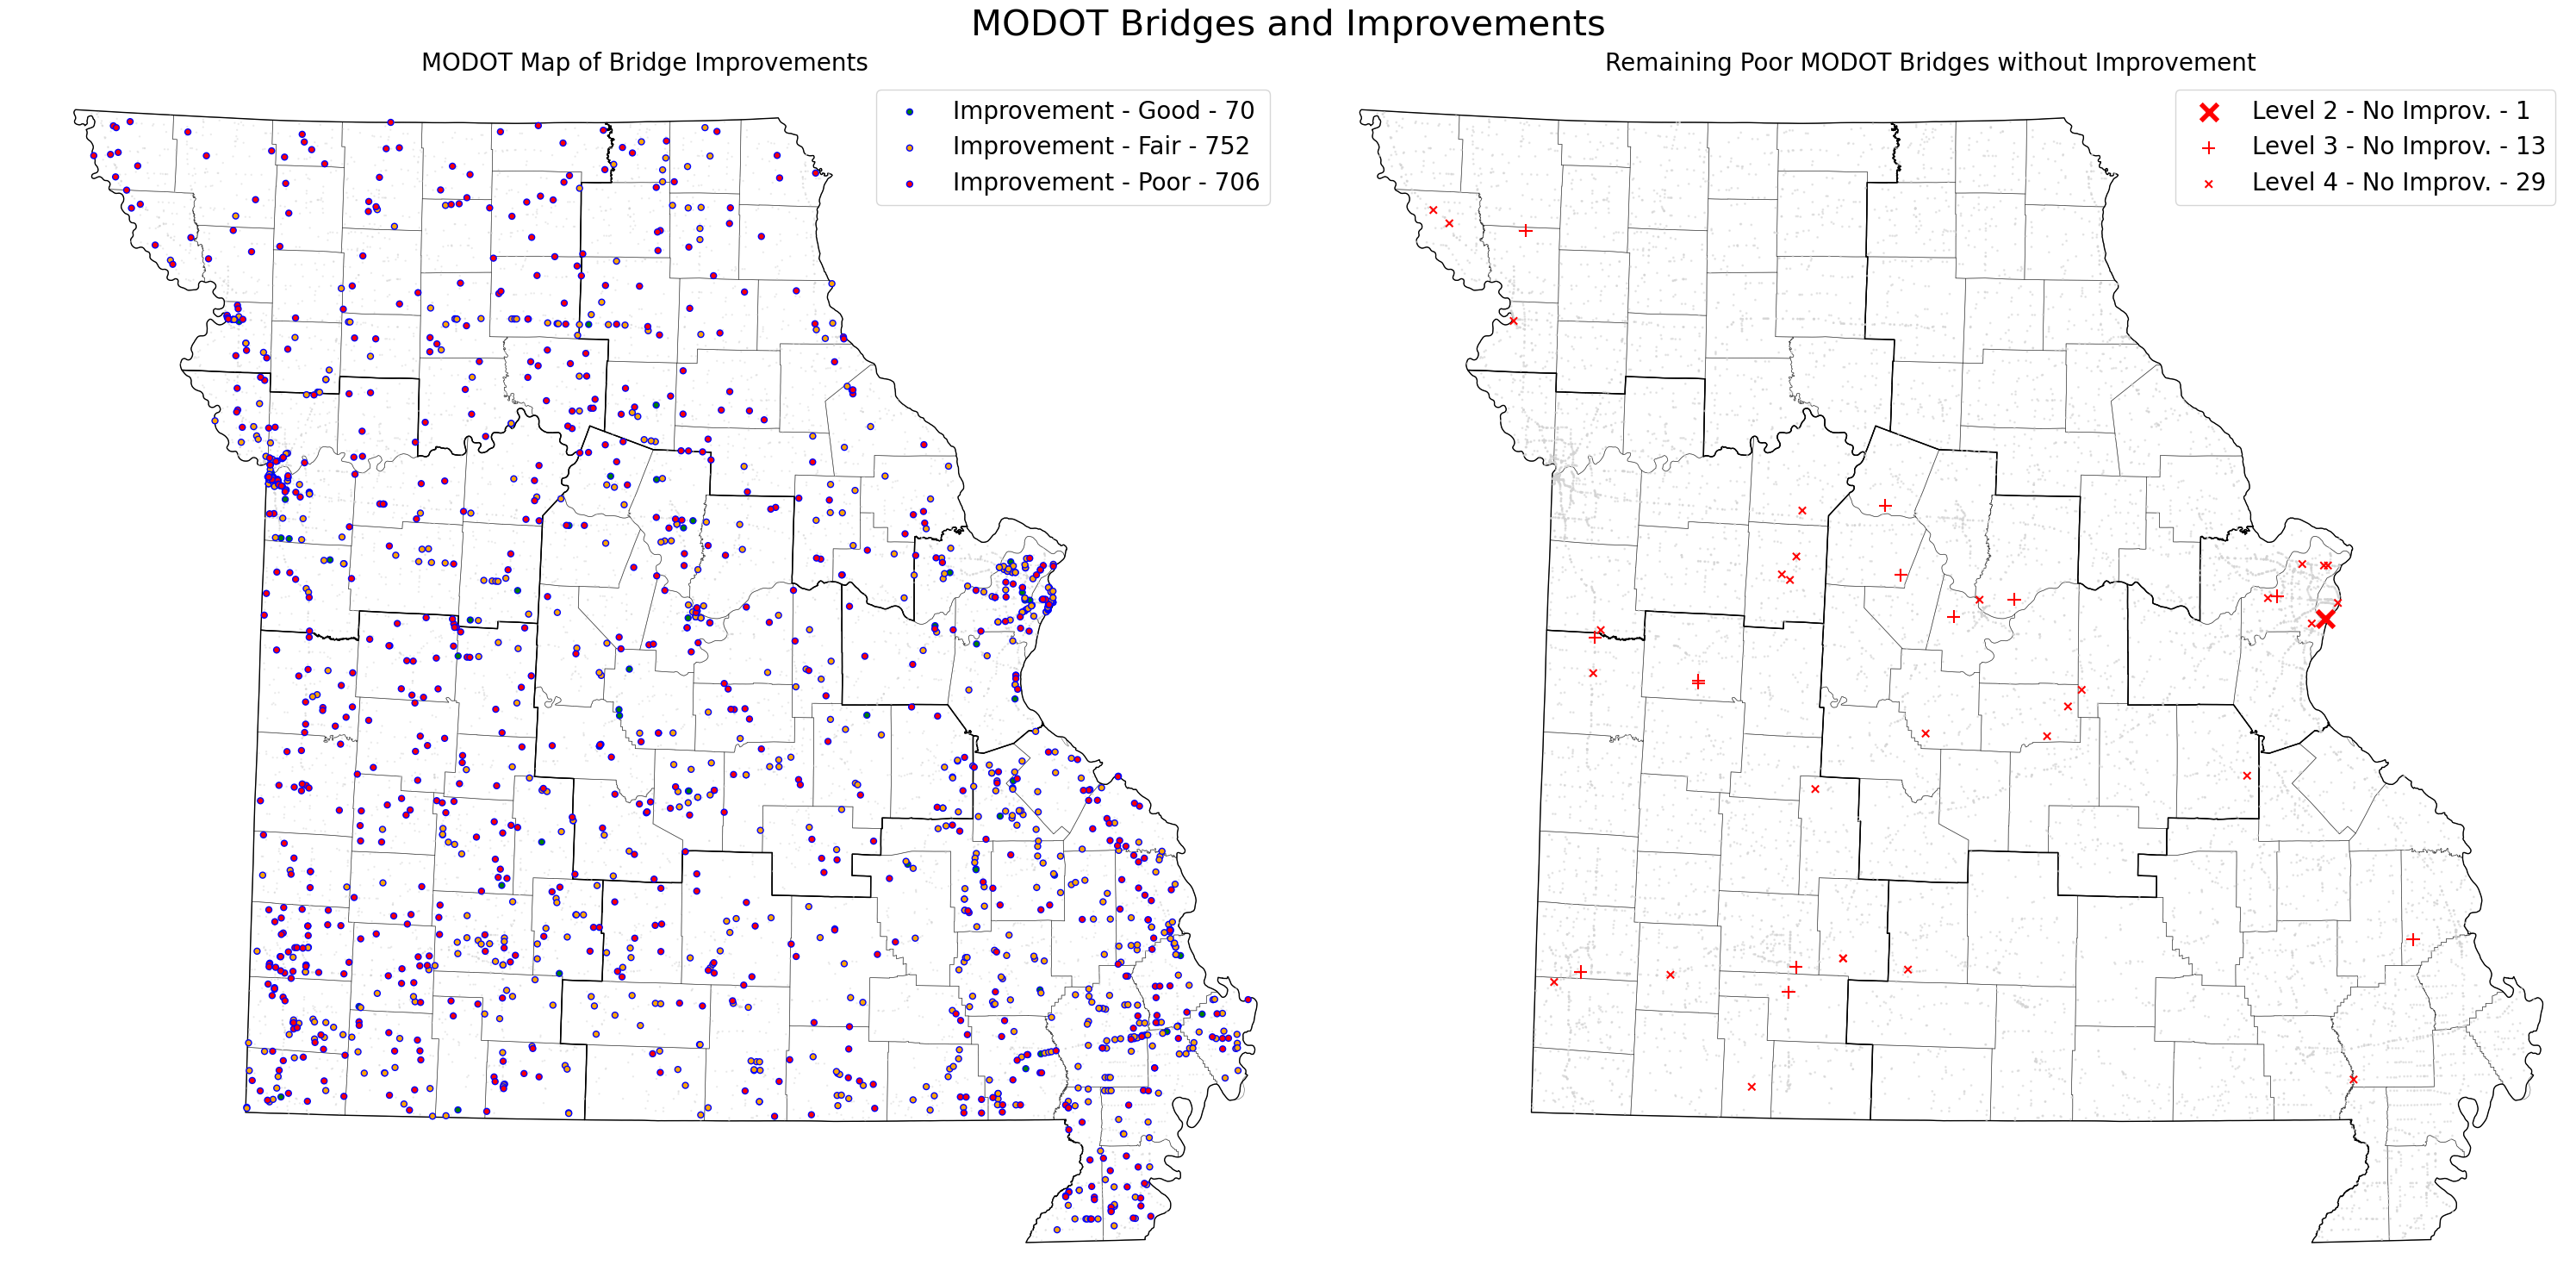

In [12]:
proj = gcrs.AlbersEqualArea(central_latitude=39.5055, central_longitude=-91.5238)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(30, 16), subplot_kw={'projection': proj})
plt.tight_layout()

#adding in county lines at a low alpha to help orient viewer, but not overwhelm
gplt.polyplot(
    county_bounds,
    linewidth=.5,
    projection=proj,
    facecolor="none",
    edgecolor='black',
    alpha=0.5,
    ax=ax1
)

#adding in MODOT districts to aid in contextualizing analysis
gplt.polyplot(
    districts,
    linewidth=1,
    projection=proj,
    facecolor="none",
    edgecolor='black',
    alpha=1,
    ax=ax1,
)

#plotting each bridgepoints
gplt.pointplot(bridge_points.geometry,
               color="lightgrey", 
               s=.7, 
               ax=ax1, 
               alpha = .4,
               extent= districts.buffer(.1).total_bounds)


gplt.pointplot(bridge_points[(bridge_points["YEAR_OF_IM"]!=0)&(bridge_points["BRIDGE_CON"]=="G")].geometry,
               color='green',
               s=5, 
               edgecolor='blue',
               linewidths=1,
               marker = 'o',
               ax=ax1, 
               alpha = 1,
               label = "Improvement - Good - 70",
               extent= districts.buffer(.1).total_bounds)
gplt.pointplot(bridge_points[(bridge_points["YEAR_OF_IM"]!=0)&(bridge_points["BRIDGE_CON"]=="F")].geometry,
               color='orange',
               s=5, 
               edgecolor='blue',
               linewidths=1,
               marker = 'o',
               ax=ax1, 
               alpha = 1,
               label = "Improvement - Fair - 752",
               extent= districts.buffer(.1).total_bounds)
gplt.pointplot(bridge_points[(bridge_points["BRIDGE_CON"]=="P")&(bridge_points["YEAR_OF_IM"]!=0)].geometry,
               color="red", 
               s=5, 
               edgecolor='blue',
               linewidths=1,
               marker = 'o',
               ax=ax1, 
               alpha = 1,
               label = "Improvement - Poor - 706",
               extent= districts.buffer(.1).total_bounds)

ax1.legend(fontsize=20)

gplt.polyplot(
    county_bounds,
    linewidth=.5,
    projection=proj,
    facecolor="none",
    edgecolor='black',
    alpha=0.5,
    ax=ax2,
)

#adding in MODOT districts to aid in contextualizing analysis
gplt.polyplot(
    districts,
    linewidth=1,
    projection=proj,
    facecolor="none",
    edgecolor='black',
    alpha=1,
    ax=ax2,
)

#plotting each bridgepoints
gplt.pointplot(bridge_points[bridge_points["YEAR_OF_IM"]==0].geometry,
               color="lightgrey", 
               s=1, 
               ax=ax2, 
               alpha = .5,
               extent= districts.buffer(.1).total_bounds)
gplt.pointplot(bridge_points[(bridge_points["YEAR_OF_IM"]!=0)].geometry,
               color='lightgrey',
               s=1, 
               marker = 'o',
               ax=ax2, 
               alpha = .5,
               #label = "Total Improvements - 1,528",
               extent= districts.buffer(.1).total_bounds)
gplt.pointplot(bridge_points[(bridge_points["LOWEST_RAT"]==2)&(bridge_points["YEAR_OF_IM"]==0)].geometry,
               color="red", 
               s=14, 
               marker = 'x',
               linewidths=4,
               ax=ax2, 
               alpha = 1,
               label = "Level 2 - No Improv. - 1",
               extent= districts.buffer(.1).total_bounds)
gplt.pointplot(bridge_points[(bridge_points["LOWEST_RAT"]==3)&(bridge_points["YEAR_OF_IM"]==0)].geometry,
               color="red", 
               s=11, 
               marker = '+',
               ax=ax2, 
               alpha = 1,
               label = "Level 3 - No Improv. - 13",
               extent= districts.buffer(.1).total_bounds)
gplt.pointplot(bridge_points[(bridge_points["LOWEST_RAT"]==4)&(bridge_points["YEAR_OF_IM"]==0)].geometry,
               color="red", 
               s=6, 
               marker = 'x',
               ax=ax2, 
               alpha = 1,
               label = "Level 4 - No Improv. - 29",
               extent= districts.buffer(.1).total_bounds)


ax2.legend(fontsize=20)
ax1.set_title("MODOT Map of Bridge Improvements",fontsize=20)
ax2.set_title("Remaining Poor MODOT Bridges without Improvement", fontsize=20)
fig.suptitle("MODOT Bridges and Improvements", fontsize=30);
